In [9]:
from obspy import read, Trace, Stream, UTCDateTime
from obspy.io.segy.core import _read_segy, _read_su
import numpy as np
import matplotlib.pyplot as plt

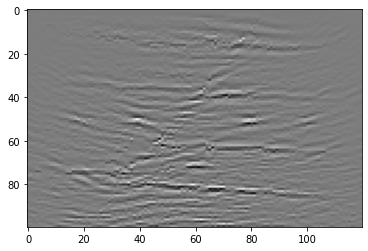

In [2]:
filename = "Data/SEGY_files/teste_sudiffhetero_tpow1gpow08trap800_f510100105.su"

st = _read_su(filename)

#dt = st[0].stats.delta
#dx = 10
#dz = dx
#nx = np.shape(st)[0]
#nt = np.shape(st)[1]

gather = np.zeros([nx,nt])

for i in range(len(gather)):
    gather[i] = st[i]
    
teste_diffs = gather.T

plt.imshow(teste_diffs, aspect="auto", cmap="binary")
plt.show()

(100, 120)
(100,)


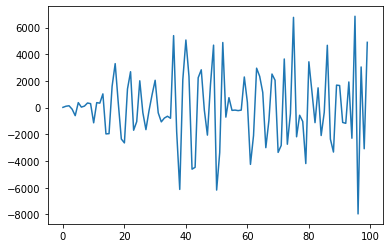

(51,)
(51,)


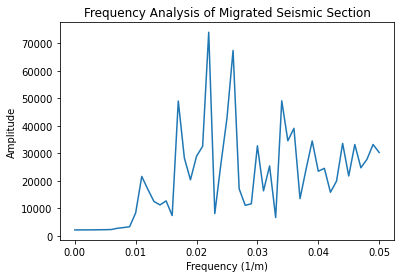

In [3]:
trace_diff = np.sum(teste_diffs,axis=1)
print(np.shape(teste_diffs))
print(np.shape(trace_diff))

plt.plot(trace_diff)
plt.show()

diff_fft = np.fft.rfft(trace_diff)
amplitude_spectrum = np.abs(diff_fft)
depth_interval = 10 #meters?  # Adjust this based on your depth data
depth_axis = np.fft.rfftfreq(100, d=depth_interval)

print(np.shape(amplitude_spectrum))
print(np.shape(depth_axis))

plt.plot(depth_axis, amplitude_spectrum)
plt.title('Frequency Analysis of Migrated Seismic Section')
plt.xlabel('Frequency (1/m)')
plt.ylabel('Amplitude')
plt.show()

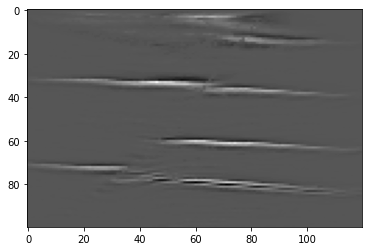

(100, 120)
(100,)


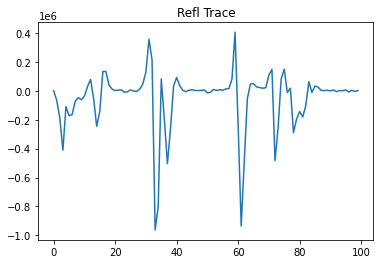

(51,)
(51,)


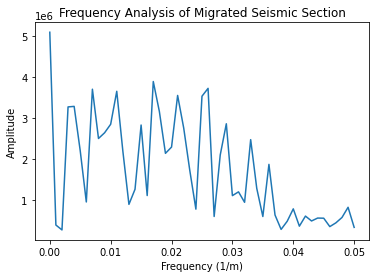

In [4]:
filename = "Data/SEGY_files/refls_heter.sgy"
st_refl = _read_segy(filename)

gather2 = np.zeros([nx,nt])

for i in range(len(gather)):
    gather2[i] = st_refl[i]
    
teste_refl = gather2.T

plt.imshow(teste_refl, aspect="auto", cmap="binary")
plt.show()

trace_refl = np.sum(teste_refl,axis=1)

print(np.shape(teste_refl))
print(np.shape(trace_refl))

plt.plot(trace_refl)
plt.title("Refl Trace")
plt.show()

refl_fft = np.fft.rfft(trace_refl)
amplitude_spectrum_refl = np.abs(refl_fft)
depth_interval = 10 #meters
depth_axis = np.fft.rfftfreq(100, d=depth_interval)

print(np.shape(amplitude_spectrum_refl))
print(np.shape(depth_axis))

plt.plot(depth_axis, amplitude_spectrum_refl)
plt.title('Frequency Analysis of Migrated Seismic Section')
plt.xlabel('Frequency (1/m)')
plt.ylabel('Amplitude')
plt.show()

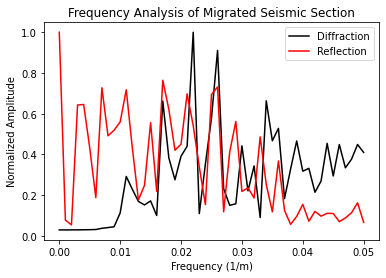

In [5]:
max_refl = np.max(amplitude_spectrum_refl)
max_diff = np.max(amplitude_spectrum)

norm_amp_spec_diff = amplitude_spectrum/max_diff
norm_amp_spec_refl = amplitude_spectrum_refl/max_refl

plt.plot(depth_axis, norm_amp_spec_diff, "k", label="Diffraction")
plt.plot(depth_axis, norm_amp_spec_refl, "r", label="Reflection")
plt.title('Frequency Analysis of Migrated Seismic Section')
plt.xlabel('Frequency (1/m)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.show()